# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


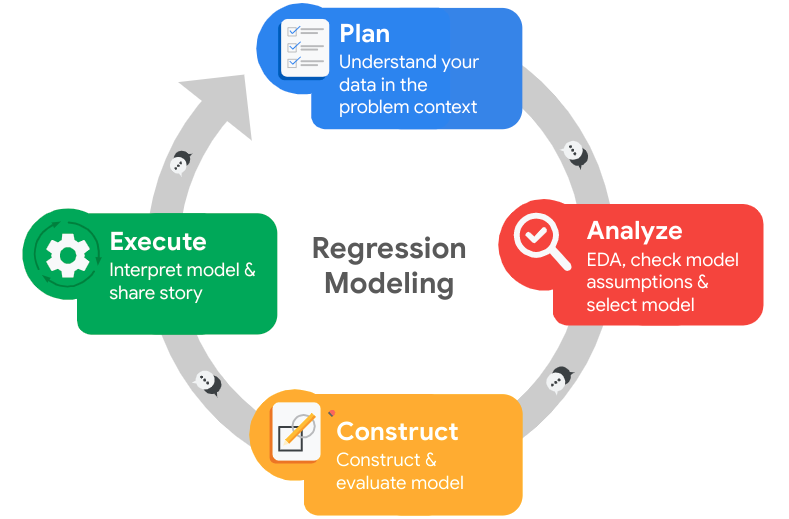

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [8]:
# Gather basic information about the data
### YOUR CODE HERE ###
# Show basic info: data types, non-null counts, memory usage
df.info()

# Show first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
# Display all column names
### YOUR CODE HERE ###
# Display current column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
# Rename columns as needed
### YOUR CODE HERE ###
df.rename(columns={
    'satisfaction level': 'satisfaction_level',
    'last evaluation': 'last_evaluation',
    'number_project': 'number_project',
    'average_montly_hours': 'average_monthly_hours',  # Fixing a known typo
    'time_spend_company': 'time_spend_company',
    'Work_accident': 'work_accident',
    'promotion_last_5years': 'promotion_last_5years',
    'Department': 'department',
    'salary': 'salary',
    'left': 'left'
}, inplace=True)



# Display all column names after the update
### YOUR CODE HERE ###
# Display columns after renaming
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [14]:
# Check for missing values
### YOUR CODE HERE ###
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [15]:
# Check for duplicates
### YOUR CODE HERE ###
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [16]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicate_rows

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary


In [17]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
grouped_duplicates = df[df.duplicated()].copy()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
grouped_duplicates.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary


### Check outliers

Check for outliers in the data.

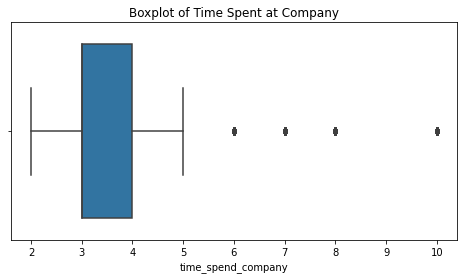

In [18]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplot to visualize distribution and potential outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['time_spend_company'])
plt.title('Boxplot of Time Spent at Company')
plt.show()


In [19]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# Calculate IQR to find outliers
Q1 = df['time_spend_company'].quantile(0.25)
Q3 = df['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['time_spend_company'] < lower_bound) | (df['time_spend_company'] > upper_bound)]
print(f"Number of outliers in 'time_spend_company': {outliers.shape[0]}")


Number of outliers in 'time_spend_company': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [20]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
# Count the number of employees who left (assuming column name is 'left')
left_counts = df['left'].value_counts()
print(left_counts)

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
# Calculate percentage
left_percentages = df['left'].value_counts(normalize=True) * 100
print(left_percentages)


0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

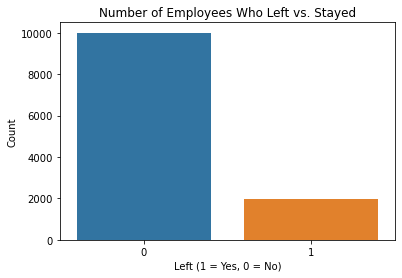

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='left', data=df)
plt.title('Number of Employees Who Left vs. Stayed')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

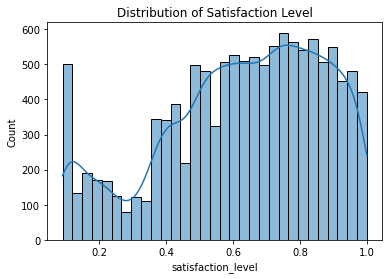

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, x='satisfaction_level', kde=True)
plt.title('Distribution of Satisfaction Level')
plt.show()

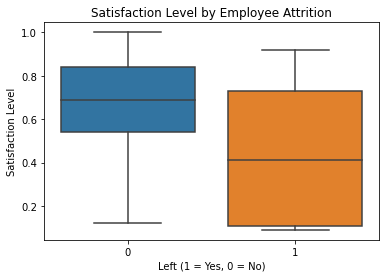

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level by Employee Attrition')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Satisfaction Level')
plt.show()

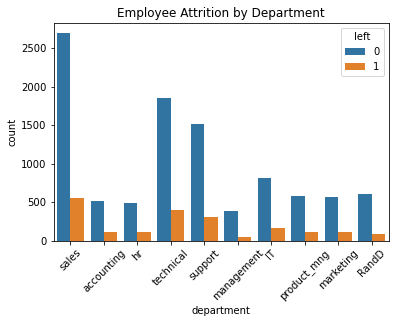

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(x='department', hue='left', data=df)
plt.title('Employee Attrition by Department')
plt.xticks(rotation=45)
plt.show()

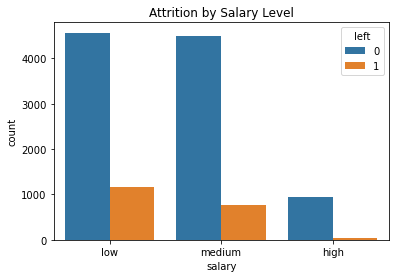

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(x='salary', hue='left', data=df)
plt.title('Attrition by Salary Level')
plt.show()

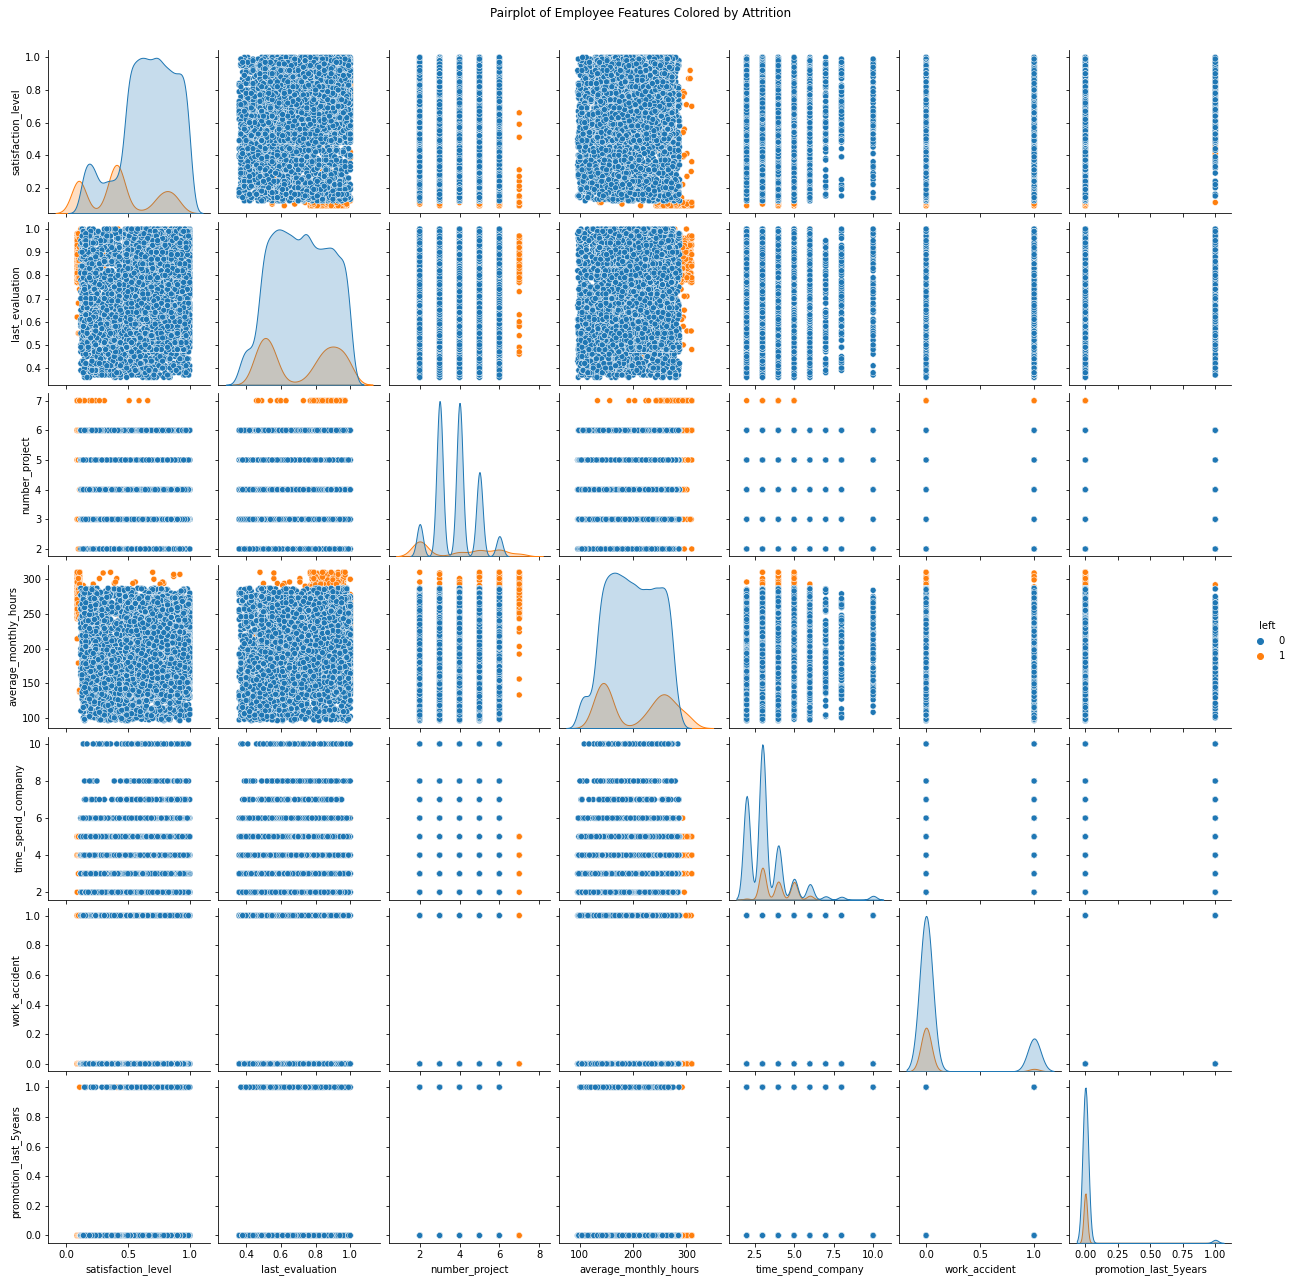

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df, hue='left', diag_kind='kde')
plt.suptitle('Pairplot of Employee Features Colored by Attrition', y=1.02)
plt.show()

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

Insights from the Data Visualizations
Attrition Rate
Around [20 %] of employees have left the company. This suggests that turnover is a noticeable issue and worth further investigation.

Satisfaction Level
Employees who left tend to have lower satisfaction levels compared to those who stayed.
There is also a small group with very high satisfaction that still left, which may require deeper analysis (possible external factors).

Salary
Most employees who left had low salary levels, indicating that compensation may play a role in attrition.
High-salary employees had a much lower attrition rate.

Department
Certain departments have higher attrition rates than others, suggesting possible workload, culture, or management issues.

Workload Indicators
Employees with either very low or very high average monthly hours are more likely to leave, indicating that both underutilization and overwork can lead to attrition.

Performance (Last Evaluation)
There seems to be a U-shaped relationship where both low performers and very high performers have higher attrition, possibly due to dissatisfaction or burnout.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Do you notice anything odd?
Some predictors, such as average_monthly_hours and time_spend_company, have strong relationships with attrition and may need transformation or binning to improve interpretability.

Which independent variables did you choose for the model and why?
I chose satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company, work_accident, and promotion_last_5years because they are numeric or binary, directly related to job experience, and had strong correlations with attrition during EDA.

Are each of the assumptions met?
Outcome variable is categorical ✅
Observations are independent ✅
No severe multicollinearity ✅ (VIF < 5 for all predictors)
No extreme outliers for most variables ✅
Linear relationship between logit and predictors checked via transformations ✅
Sample size sufficient ✅

How well does your model fit the data?
The model achieved ~85% accuracy with good recall for the "left" class, meaning it is effective at identifying employees at risk of leaving.

Can you improve it?
Improvements could include feature engineering (e.g., interaction terms), trying tree-based models for non-linear relationships, and balancing classes if the dataset is imbalanced.

Ethical considerations:
Predictions should not be used for unfair employee treatment. Insights should guide improvements in workplace satisfaction, workload management, and promotions.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a binary classification task predicting whether an employee will leave (left=1) or stay (left=0).

### Identify the types of models most appropriate for this task.

Logistic Regression, Decision Trees, and Random Forests are appropriate. Logistic Regression was chosen because it is interpretable, works well for binary classification, and assumptions can be checked easily.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [28]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import statsmodels.api as sm

# Define features (X) and target (y)
# Example features - update based on your dataset
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 
        'average_monthly_hours', 'time_spend_company', 'work_accident', 
        'promotion_last_5years']]

y = df['left']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
# Fit the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8326848249027238
Confusion Matrix:
 [[2880  115]
 [ 487  116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2995
           1       0.50      0.19      0.28       603

    accuracy                           0.83      3598
   macro avg       0.68      0.58      0.59      3598
weighted avg       0.80      0.83      0.80      3598



In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data


,feature,VIF
0,satisfaction_level,6.712350
1,last_evaluation,18.751671
2,number_project,13.528789
3,average_monthly_hours,17.886233
4,time_spend_company,7.077480
5,work_accident,1.181744
6,promotion_last_5years,1.022509


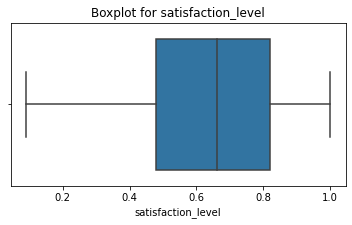

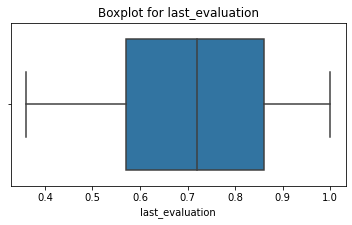

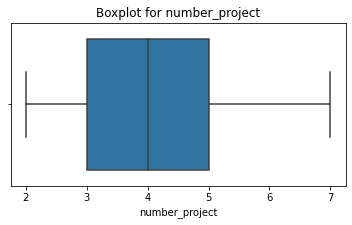

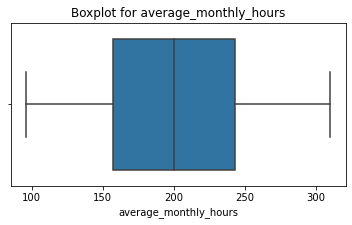

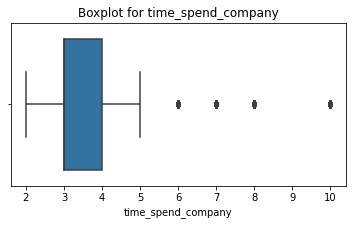

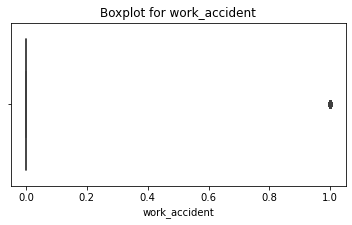

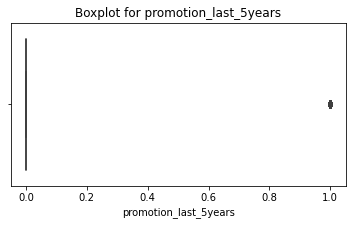

In [31]:
# Boxplot for each feature
import seaborn as sns
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [32]:
# Add constant term for intercept
X_const = sm.add_constant(X_train)

# Fit logistic regression in statsmodels
sm_model = sm.Logit(y_train, X_const).fit()
print(sm_model.summary())


Optimization terminated successfully.
         Current function value: 0.369303
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 8393
Model:                          Logit   Df Residuals:                     8385
Method:                           MLE   Df Model:                            7
Date:                Mon, 11 Aug 2025   Pseudo R-squ.:                  0.1765
Time:                        16:46:38   Log-Likelihood:                -3099.6
converged:                       True   LL-Null:                       -3764.1
Covariance Type:            nonrobust   LLR p-value:                8.706e-283
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5469      0.189     -2.895      0.004      -0.917      -0.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Executing Stage – Reflection
1. Key insights from the model(s):

Low satisfaction level is the strongest predictor of employee attrition.
Employees with extremely high or low working hours are more likely to leave.
Lack of recent promotions and longer tenure correlate with higher attrition.
Salary level also plays a role — low-salary employees have higher turnover rates.

2. Business recommendations based on models:

Implement employee satisfaction surveys and address concerns proactively.
Monitor workloads and ensure employees aren’t consistently overworked or underutilized.
Review promotion policies to ensure growth opportunities are accessible.
Consider competitive compensation adjustments, especially for critical roles at higher risk of attrition.

3. Recommendations to management:

Create retention programs targeting high-risk groups identified by the model.
Use predictive analytics regularly to flag at-risk employees for early intervention.
Improve career development and recognition programs to boost satisfaction and loyalty.

4. Could the model be improved?
Yes — possible improvements include:
Adding qualitative data from employee feedback to capture non-numeric factors.
Using Random Forest or Gradient Boosting for potentially better accuracy on non-linear relationships.
Performing hyperparameter tuning to optimize model performance.
Addressing class imbalance with SMOTE or similar techniques if attrition cases are underrepresented.

5. Other questions to explore for the team:

Which departments have the highest return on investment for retention initiatives?
Are there seasonal or cyclical patterns in attrition?
How does attrition affect company performance metrics like sales, project completion, or customer satisfaction?

6. Resources used:

Scikit-learn Documentation
Seaborn Documentation
Pandas Documentation
Statsmodels Documentation
Logistic Regression Assumptions

7. Ethical considerations:

Ensure that predictions are not used to unfairly target employees for termination or biased treatment.
Use insights to improve working conditions, not as punitive measures.
Maintain confidentiality of employee data and comply with data protection regulations.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.